# Deep Learning Regression Example

### Problem Statement:
We aim to predict the median value of owner-occupied homes in Boston suburbs in thousands of dollars (target variable) based on features such as crime rate, average number of rooms, distance to employment centers, etc.

### Dataset:
We'll use the Boston Housing Prices dataset, which is a well-known dataset available in scikit-learn. It contains 506 samples with 13 features each.

Let's import the necessary libraries and load the dataset.


## Step 1: Import libraries anda data

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

# turn off warnings
import warnings
warnings.filterwarnings('ignore')

# Load the Boston Housing Prices dataset
boston = load_boston()


### Features in the Boston Housing Prices Dataset

1. **CRIM**: Per capita crime rate by town.
2. **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.
3. **INDUS**: Proportion of non-retail business acres per town.
4. **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
5. **NOX**: Nitric oxides concentration (parts per 10 million).
6. **RM**: Average number of rooms per dwelling.
7. **AGE**: Proportion of owner-occupied units built prior to 1940.
8. **DIS**: Weighted distances to five Boston employment centers.
9. **RAD**: Index of accessibility to radial highways.
10. **TAX**: Full-value property tax rate per $10,000.
11. **PTRATIO**: Pupil-teacher ratio by town.
12. **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
13. **LSTAT**: Percentage of lower status of the population.

Each feature represents different aspects of the Boston suburb areas, such as crime rate, property tax rate, pupil-teacher ratio, etc.

### Target Variable

**MEDV**: Median value of owner-occupied homes (in $1000s).

`MEDV` is the target variable in the Boston Housing Prices dataset. Our goal is to predict this variable based on the other features in the dataset. It represents the median value of owner-occupied homes in various suburbs of Boston, measured in thousands of dollars. This variable is of utmost importance in real estate and housing market analysis, as it provides insights into property values in different areas.


## Step 2: Data Preparation

In [3]:
## Exploring the Dataset:
# Convert the dataset to a DataFrame
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

# Add the target variable (median house price) to the DataFrame
boston_df['MEDV'] = boston.target

# Display the first few rows of the DataFrame
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
## Preprocessing:
# Check for missing values
missing_values = boston_df.isnull().sum()
print("Missing Values:")
print(missing_values)

# There are no missing values, so no preprocessing is required for handling missing data.

## Splitting the Data:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = boston_df.drop('MEDV', axis=1)
y = boston_df['MEDV']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Missing Values:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
Training set shape: (404, 13) (404,)
Testing set shape: (102, 13) (102,)


### Visualizing the Dataset

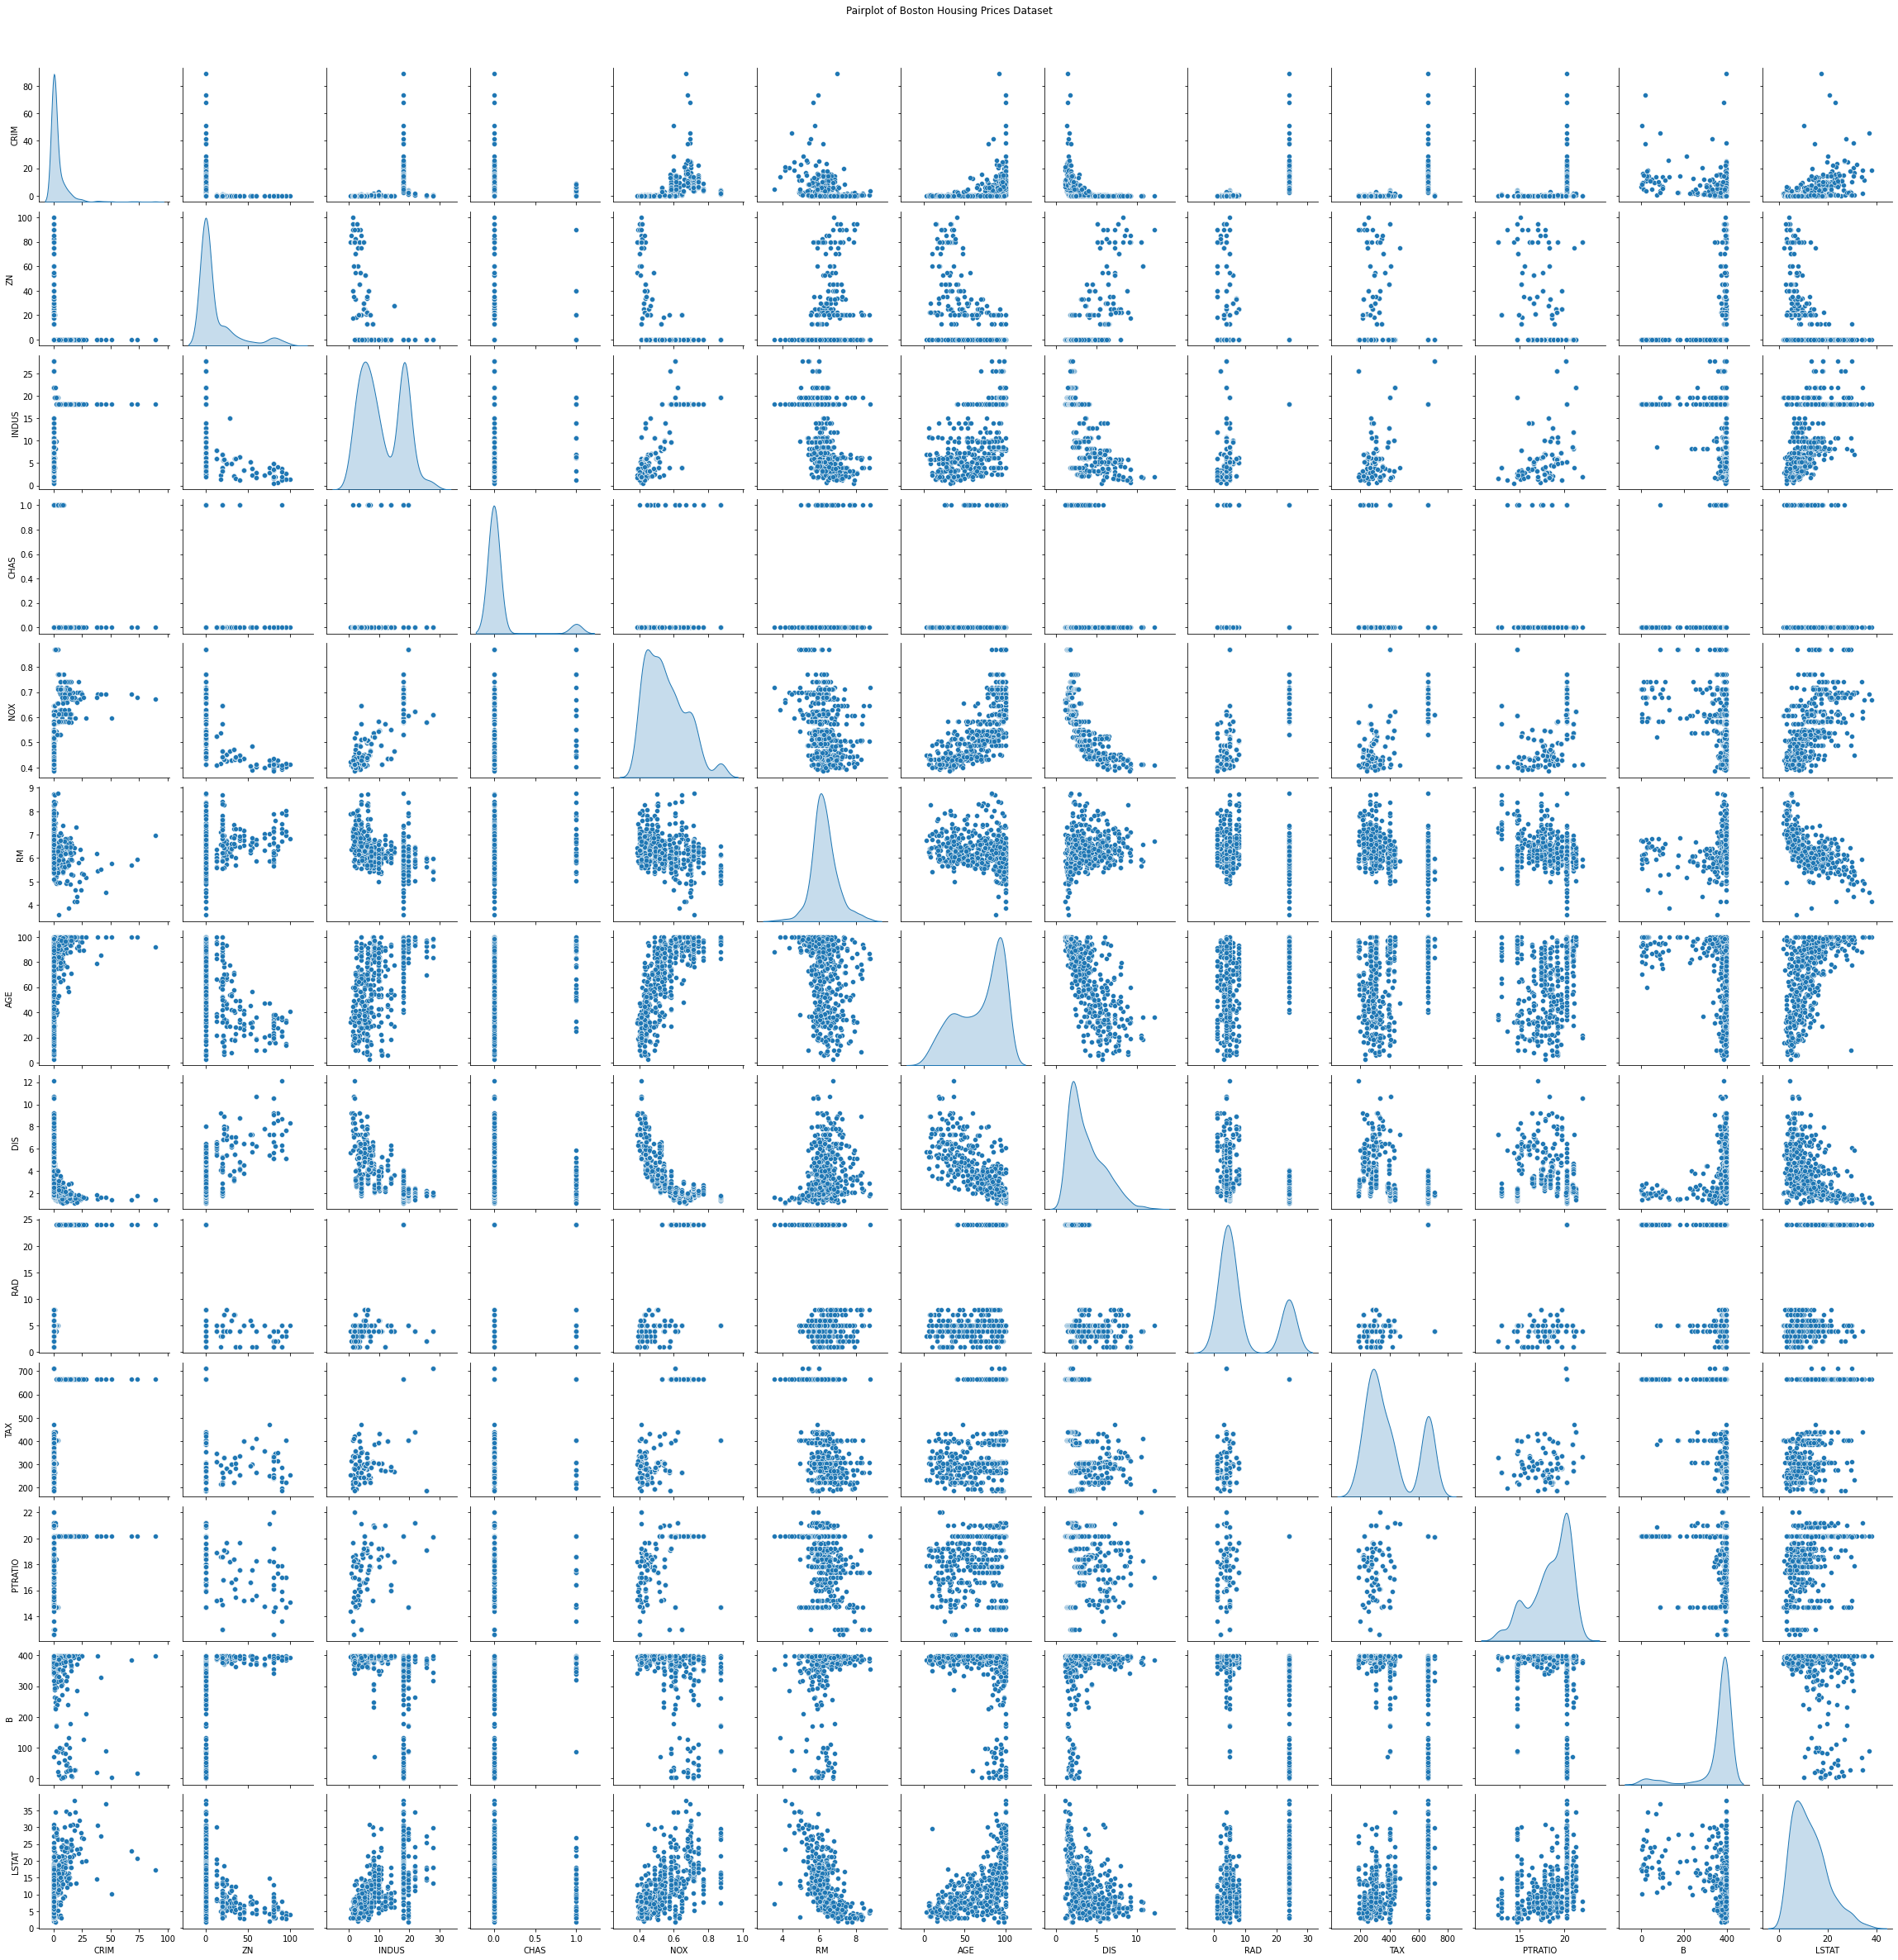

In [4]:
## Pairplot
sns.pairplot(boston_df, vars=boston.feature_names, diag_kind='kde')
plt.suptitle("Pairplot of Boston Housing Prices Dataset", y=1.02)
plt.show()


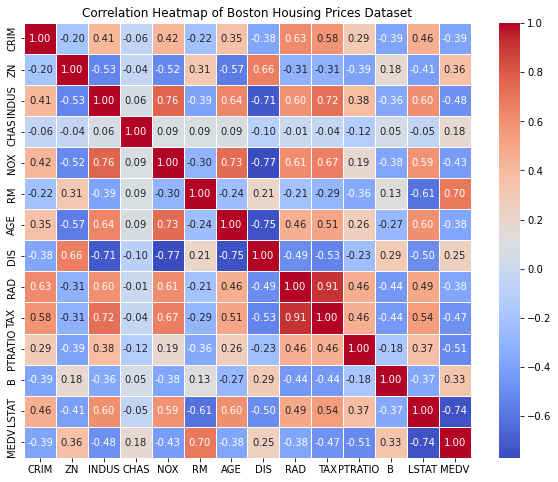

In [5]:
## Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(boston_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Boston Housing Prices Dataset")
plt.show()


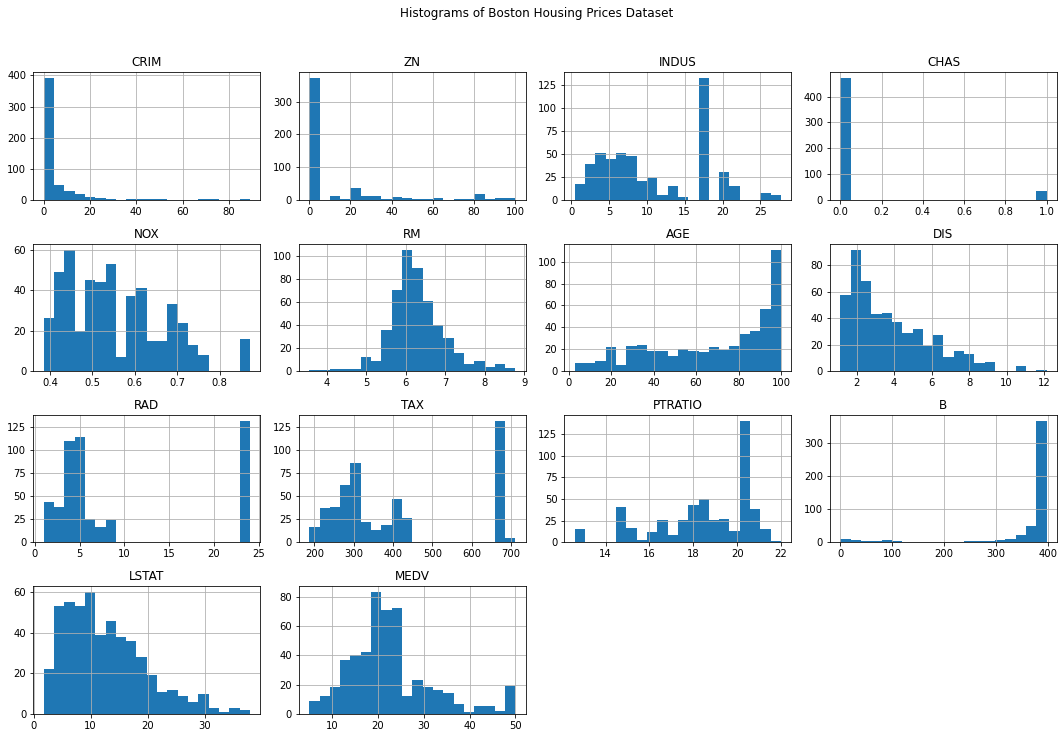

In [6]:
## Histograms
boston_df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Boston Housing Prices Dataset", y=1.02)
plt.tight_layout()
plt.show()


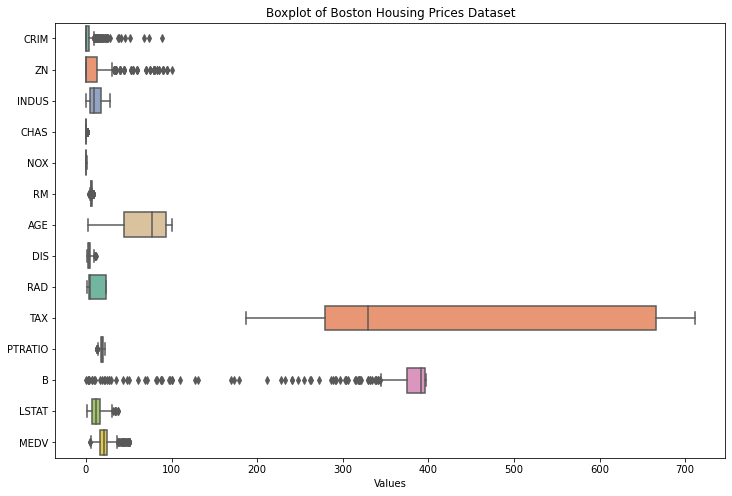

In [7]:
## Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=boston_df, orient='h', palette='Set2')
plt.title("Boxplot of Boston Housing Prices Dataset")
plt.xlabel("Values")
plt.show()


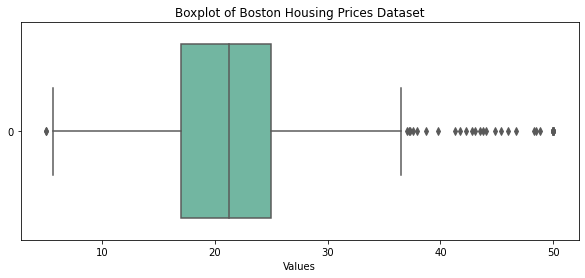

In [8]:
## Boxplots
plt.figure(figsize=(10, 4))
sns.boxplot(data=boston_df['MEDV'], orient='h', palette='Set2')
plt.title("Boxplot of Boston Housing Prices Dataset")
plt.xlabel("Values")
plt.show()

In [9]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(boston_df['MEDV'], 25)
Q3 = np.percentile(boston_df['MEDV'], 75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers = boston_df[(boston_df['MEDV'] < lower_bound) | (boston_df['MEDV'] > upper_bound)]

print("Number of outliers:", outliers.shape[0])
print("Number of data:",boston_df.shape[0])

Number of outliers: 40
Number of data: 506


## Step 3: Establish the ANN model

In [5]:
## Defining the Neural Network Architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Alternative Model Architecture with Different Layer Types
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, ActivityRegularization

# Create a sequential model
model = Sequential()

# Add a fully connected hidden layer with 8 neurons and ReLU activation function
model.add(Dense(8, input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())  # Batch Normalization layer
model.add(Activation('relu'))    # Activation layer

# Add another fully connected hidden layer with 4 neurons and LeakyReLU activation function
model.add(Dense(4))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))  # LeakyReLU activation layer

# Add activity regularization to the output layer
model.add(Dense(1))
model.add(ActivityRegularization(l1=0.01))  # L1 regularization layer

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 112       
_________________________________________________________________
batch_normalization (BatchNo (None, 8)                 32        
_________________________________________________________________
activation (Activation)      (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
batch_normalization_1 (Batch (None, 4)                 16        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5

In this architecture:
We use a Sequential model, where layers are added sequentially.
1. Input Layer
We start by creating a sequential model using Keras' Sequential class, which allows us to stack layers sequentially.
2. First Dense Layer
We add the first dense (fully connected) layer with 8 neurons using the Dense class from Keras.
The input_shape parameter specifies the shape of the input data, which is determined by the number of features in our dataset (X_train.shape[1]).
This layer is followed by a batch normalization layer (BatchNormalization) which normalizes the activations of the previous layer, helping to stabilize and speed up the training process.
Then, we apply the ReLU (Rectified Linear Unit) activation function using the Activation class with the argument 'relu'. ReLU is a commonly used activation function that introduces non-linearity into the model.
3. Second Dense Layer
We add another dense layer with 4 neurons.
Similar to the first layer, this layer is followed by batch normalization and the LeakyReLU activation function (LeakyReLU), which allows a small gradient when the unit is not active. This can help prevent dead neurons during training.
4. Output Layer
Finally, we add the output layer with 1 neuron, representing the predicted median house price.
No activation function is applied to the output layer for regression tasks, as we want the model to predict a continuous value directly.
Additionally, we add activity regularization to the output layer using L1 regularization (ActivityRegularization). L1 regularization penalizes large weights in the network, helping to prevent overfitting.
5. Model Summary
We display the summary of the model, which provides information about the architecture of the neural network, including the number of parameters in each layer.

This architecture aims to capture the relationships between the input features and the target variable (median house prices) while incorporating batch normalization, LeakyReLU activation, and L1 regularization for better training stability and generalization.

### What certain layers do in ANN architecture?
While fully connected (dense) layers and dropout layers are commonly used in neural networks for regression tasks, there are other types of layers that can be beneficial. Here are some alternatives:

**Batch Normalization:** This layer normalizes the activations of the previous layer at each batch, helping to stabilize and speed up the training process.

**Activation Layers:** Although activation layers are typically used after dense layers, you can use specific activation functions directly as layers in the network.

**Regularization Layers:** Apart from dropout, there are other regularization techniques such as L1 and L2 regularization, which penalize large weights in the network.

**Normalization Layers:** These layers normalize the input data, helping the model to converge faster and improving generalization.

## Step 4: Model Compilation
In this step, we'll specify the loss function, optimizer, and evaluation metrics for training the model.

In [6]:
## Compiling the Model
# Compile the model with mean squared error loss function and Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

## Display Model Configuration
# Display model configuration
print("Model Compiled Successfully!")


Model Compiled Successfully!


We use mean squared error (MSE) as the loss function since it's commonly used for regression tasks. The goal is to minimize the difference between predicted and actual values.
We use the Adam optimizer, which is an efficient optimization algorithm commonly used in deep learning models.
We don't specify any evaluation metrics here, but we can evaluate the model's performance later using metrics such as mean absolute error (MAE) or R-squared.

## Step 5: Training the Model

Epoch 1/100
11/11 [==============================] - 0s 15ms/step - loss: 606.9234 - val_loss: 639.6760
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 603.6294 - val_loss: 614.7372
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 600.0175 - val_loss: 597.3141
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 596.1163 - val_loss: 588.5389
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 592.5386 - val_loss: 587.4951
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 588.2910 - val_loss: 591.3741
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 584.9022 - val_loss: 595.4481
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 580.6686 - val_loss: 596.1946
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 578.3997 - val_loss: 593.8696
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss

Epoch 80/100
11/11 [==============================] - 0s 3ms/step - loss: 257.3615 - val_loss: 247.3128
Epoch 81/100
11/11 [==============================] - 0s 2ms/step - loss: 251.0459 - val_loss: 271.9647
Epoch 82/100
11/11 [==============================] - 0s 2ms/step - loss: 249.6407 - val_loss: 292.1805
Epoch 83/100
11/11 [==============================] - 0s 2ms/step - loss: 244.7203 - val_loss: 278.3514
Epoch 84/100
11/11 [==============================] - 0s 2ms/step - loss: 239.2200 - val_loss: 252.4563
Epoch 85/100
11/11 [==============================] - 0s 2ms/step - loss: 231.5600 - val_loss: 230.8975
Epoch 86/100
11/11 [==============================] - 0s 2ms/step - loss: 226.1872 - val_loss: 221.2521
Epoch 87/100
11/11 [==============================] - 0s 2ms/step - loss: 230.4183 - val_loss: 219.8681
Epoch 88/100
11/11 [==============================] - 0s 2ms/step - loss: 218.4993 - val_loss: 218.0770
Epoch 89/100
11/11 [==============================] - 0s 2ms/ste

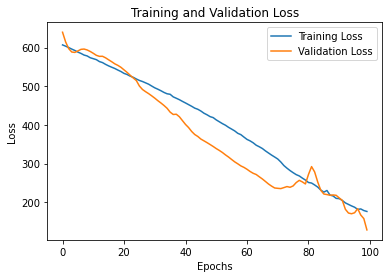

In [7]:
## Training the Model
# Train the model on the training data with batch size of 32 and 100 epochs
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2, verbose=1)

## Visualizing Training History
# Plot training history: Loss vs. Epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


We train the model using the fit method, passing the training features (X_train) and target variable (y_train), batch size of 32, and 100 epochs.

We also specify a validation split of 0.2, indicating that 20% of the training data will be used for validation during training.
The verbose parameter controls the verbosity of the training process. Setting it to 1 displays progress bars during training.
After training, we visualize the training and validation loss over epochs to monitor the model's performance and check for overfitting.

## Step 6: Model Evaluation

Test Loss: 120.2022476196289


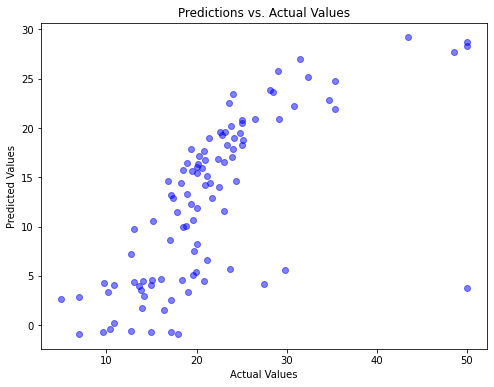

In [8]:
## Evaluating the Model
# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", loss)

## Making Predictions
# Make predictions on the test data
y_pred = model.predict(X_test)

## Visualizing Predictions vs. Actual Values
# Plotting Predictions vs. Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


We evaluate the trained model on the test dataset using the evaluate method, which returns the test loss.
We make predictions on the test data using the predict method.

Finally, we visualize the predictions vs. the actual house prices to understand how well the model performs.

In [9]:
# Calculate the average value of MEDV in the test dataset
average_MEDV = np.mean(y_test)
print("Average value of MEDV in the test dataset:", average_MEDV)

# Print the normalized loss value obtained from model evaluation
print("Normalized loss value:", loss**0.5/average_MEDV)


Average value of MEDV in the test dataset: 21.488235294117654
Normalized loss value: 0.5102177266925804


We got a very bad result. Normalized loss value should be well below 1.0 as it shows the mean squared error per the average value of the target feature. It is our error ratio.

## Step 7: Hyperparameter Tuning

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 12)                168       
_________________________________________________________________
dense_20 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 14        
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 3         
Total params: 263
Trainable params: 263
Non-trainable params: 0
_________________________________________________________________


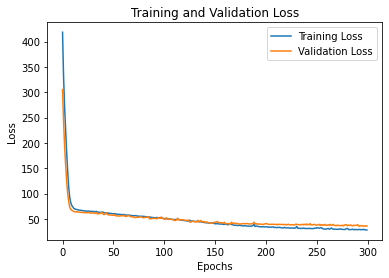

Test Loss: 25.061262130737305


In [20]:
from tensorflow.keras.initializers import HeNormal # for He initialization

## Experimenting with Hyperparameters
# Example: Changing the number of neurons in the hidden layers


# Create a sequential model
model = Sequential()

# Add the first dense layer with He initialization if you want to use an initialization method
# model.add(Dense(12, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(12, input_shape=(X_train.shape[1],), activation='relu')) # omit this line if you use the above line with initialization

model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='relu'))


# Add an output layer with 1 neuron (for regression) and no activation function
model.add(Dense(1))

# Display the model summary
model.summary()

# Compile the model with mean squared error loss function and Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model on the training data
history = model.fit(X_train, y_train, batch_size=32, epochs=300, validation_split=0.2, verbose=0)

## Visualizing Training History
# Plot training history: Loss vs. Epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", loss)


**Alternatives for Loss Functions:**

Mean Absolute Error (MAE): Instead of mean squared error (MSE), MAE measures the average absolute difference between predicted and actual values. It is less sensitive to outliers compared to MSE.

Huber Loss: Huber loss is a combination of MSE and MAE. It behaves like MSE for small errors and like MAE for large errors, making it robust to outliers.

Mean Squared Logarithmic Error (MSLE): MSLE calculates the mean of the squared logarithmic differences between the predicted and actual values. It is useful when the target values have exponential growth.

Quantile Loss: Quantile loss is used for quantile regression, where the goal is to predict specific quantiles of the target distribution.


**Alternatives for Optimizers:**

Stochastic Gradient Descent (SGD): SGD is a classic optimizer that updates weights based on the gradient of the loss function with respect to the weights. It updates weights using a fixed learning rate.

RMSprop: RMSprop is an adaptive learning rate optimization algorithm that adjusts the learning rate for each parameter based on the average of recent gradients for that parameter.

Adamax: Adamax is a variant of the Adam optimizer that is more robust to large learning rates and sparse gradients.

Adagrad: Adagrad adapts the learning rate for each parameter based on the historical gradient of that parameter. It performs larger updates for infrequent parameters and smaller updates for frequent parameters.

AdaDelta: AdaDelta is an extension of Adagrad that solves its problem of monotonically decreasing learning rates by using a moving average of squared gradients.

## Examine the results

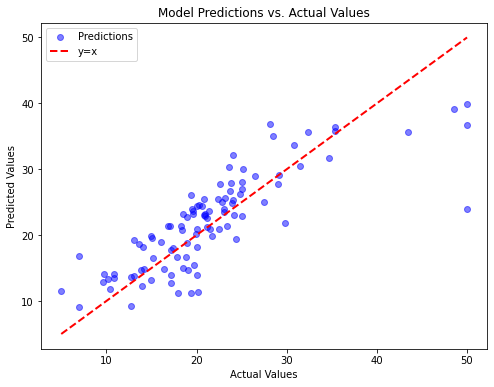

In [21]:
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = model.predict(X_test)

# Plotting Predictions vs. Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Adding the y=x line
plt.title('Model Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend([ 'Predictions', 'y=x'])
plt.show()
